In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/data.csv")
df.shape

(100, 5)

In [4]:
df.drop(["gradeof software"],axis=1, inplace = True)
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
questionnaire score(EQ),148,131,126,135,132
grade of questionnaire score(EQ),5,4,3,4,4


In [5]:
df.rename(columns={"questionnaire score(EQ)":"EQ","grade of questionnaire score(EQ)":"target"}, inplace = True)
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
EQ,148,131,126,135,132
target,5,4,3,4,4


In [6]:
X = df.drop("target", axis = 1)
y = df["target"]

In [7]:
X.shape

(100, 3)

In [8]:
y.shape

(100,)

In [10]:
X.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
EQ,148,131,126,135,132


____

## K-Nearest-Neighbors - StandardScaler

In [11]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [12]:
features = df.columns[:-1].tolist()

X_sc_df = pd.DataFrame(X_sc, columns=features)
X_sc_df.head()

,education,gender,EQ
0,1.0,1.0,1.855077
1,1.0,1.0,0.463974
2,1.0,1.0,0.054826
3,1.0,1.0,0.791292
4,1.0,1.0,0.545803


In [13]:
X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc_df, y, test_size = 0.25, random_state=42)
X_sc_train.shape, y_train.shape, X_sc_test.shape, y_test.shape

((75, 3), (75,), (25, 3), (25,))

In [14]:
knn = KNeighborsClassifier()
knn.fit(X_sc_train, y_train)
predictions = knn.predict(X_sc_test)

In [15]:
correct = 0
incorrect = 0
for prediction, truth in zip(predictions, y_test):
    if prediction == truth:
        correct += 1
    elif prediction != truth:
        incorrect += 1
    else:
        print ("Evaluating performance for processed predictions:")
        break

In [16]:
print("correct:",correct)
print("incorrect:",incorrect)
print("accuracy score:", knn.score(X_sc_test, y_test))

correct: 15
incorrect: 10
accuracy score: 0.6


In [17]:
y_pred = knn.predict(X_sc_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[2 4 0 0 0]
 [0 1 0 0 0]
 [0 1 7 1 0]
 [0 0 2 5 0]
 [0 0 0 2 0]]
0.6


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.33      0.50         6
           2       0.17      1.00      0.29         1
           3       0.78      0.78      0.78         9
           4       0.62      0.71      0.67         7
           5       0.00      0.00      0.00         2

   micro avg       0.60      0.60      0.60        25
   macro avg       0.51      0.57      0.45        25
weighted avg       0.70      0.60      0.60        25



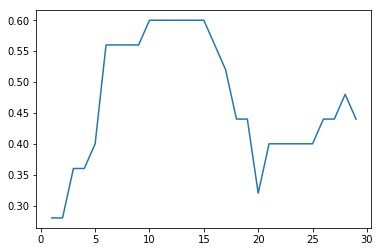

In [19]:
error=[]
for i in range (1,30):
    knn=KNeighborsClassifier(n_neighbors=i)    
    knn.fit(X_sc_train,y_train)
    pre=knn.predict(X_sc_test)
    error.append(np.mean(pre!=y_test))
    #print(classification_report(y_test,pre))
plt.plot(range(1,30),error)
plt.show()

___
## K-Nearest-Neighbors Classifier

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((75, 3), (75,), (25, 3), (25,))

In [21]:
knn = KNeighborsClassifier()

In [22]:
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [23]:
correct = 0
incorrect = 0
for prediction, truth in zip(predictions, y_test):
    if prediction == truth:
        correct += 1
    elif prediction != truth:
        incorrect += 1
    else:
        print ("Evaluating performance for processed predictions:")
        break

In [24]:
print("correct:",correct)
print("incorrect:",incorrect)
print("accuracy score:", knn.score(X_test, y_test))

correct: 24
incorrect: 1
accuracy score: 0.96


In [25]:
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[6 0 0 0 0]
 [0 1 0 0 0]
 [0 0 9 0 0]
 [0 0 0 6 1]
 [0 0 0 0 2]]
0.96


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         9
           4       1.00      0.86      0.92         7
           5       0.67      1.00      0.80         2

   micro avg       0.96      0.96      0.96        25
   macro avg       0.93      0.97      0.94        25
weighted avg       0.97      0.96      0.96        25



In [27]:
print('The accuracy of the knn classifier is {:.2f} on training data'.format(knn.score(X_train, y_train)))
print('The accuracy of the knn classifier is {:.2f} on test data'.format(knn.score(X_test, y_test)))

The accuracy of the knn classifier is 0.97 on training data
The accuracy of the knn classifier is 0.96 on test data


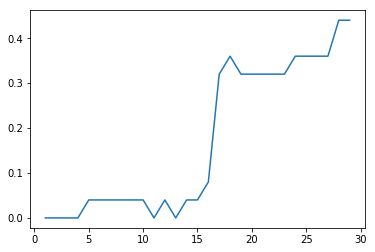

In [28]:
error=[]
for i in range (1,30):
    knn=KNeighborsClassifier(n_neighbors=i)    
    knn.fit(X_train,y_train)
    pre=knn.predict(X_test)
    error.append(np.mean(pre!=y_test))
    #print(classification_report(y_test,pre))
plt.plot(range(1,30),error)
plt.show()